# INFO 371 Lab 2: Interaction Effects

#### Instructions

Please submit your completed lab notebook by the deadline. Working together is fun and useful but you must submit your own work. Discussing the solutions and problems with your instructors and classmates is completely fine. However, **do not** copy and paste their solution(s). Remember - your code/work should not appear (directly or indirectly) on any one else's machine and vice versa. 


#### Introduction
Your task is to dig into interaction effects and answer the following question:

Does religion help overcome loneliness-caused loss of life satisfaction? 

You'll work with a subset of data from the [World Value Survey](https://www.worldvaluessurvey.org/wvs.jsp) in the wvs-satisfaction-subset.csv file. The important variables are:
- **satisfaction** - which is in response to the following question: "All things considered, how satisfied are you with your life as a whole these days?" The responses range from: _1) not at all satisfied_ ... _10) totally satisfied_
- **marital** - which is in response to the following: "Are you currently..." The possible responses are: _1) Married; 2) Living together; 3) Divorced; 4) Separated; 5) Widowed; 6) Single_
- **religious** - which is in response to the following: "Independently of whether you attend religious services or not, would you say you are...” The possible responses are: _1) A religious person; 2) Not a religious person; 3) An atheist_

In [66]:
#####

#Starting code. Do not delete or modify

import seaborn as sns
import pandas as pd
import numpy as np

def sample_plot():
    alone = [0, 0, 1, 1]
    satisfaction = [5, 3, 4, 3.5]
    religious = [0, 1, 0, 1]
    sample = pd.DataFrame({'alone': alone, 'satisfaction': satisfaction, 'religious': religious})
    ax = sns.lineplot(data = sample, x = 'alone', y = 'satisfaction', hue = 'religious', marker = 'o')
    sns.despine()
    return ax

#####

### Step 1: Data preparation

To start, let's prepare the data. This will have several steps

#### 1. Load the data.

In [67]:
data = pd.read_csv("./wvs-satisfaction-subset.csv", sep="\t")
data.head()

,satisfaction,marital,income,age,religious,onlyMyReligion,religionRules,armyRules,continent,region
0,8,6,5,21,1,2,1,1,Africa,12
1,5,6,6,24,1,1,1,1,Africa,12
2,4,6,6,26,1,3,2,1,Africa,12
3,8,6,5,28,1,3,2,2,Africa,12
4,8,1,7,35,1,3,2,2,Africa,12


#### 2. Select the variables you need: satisfaction, marital, religious.

In [68]:
data_filtered = data[["satisfaction", "marital", "religious"]]
print(len(data_filtered))
data_filtered.head()

90350


,satisfaction,marital,religious
0,8,6,1
1,5,6,1
2,4,6,1
3,8,6,1
4,8,1,1


#### 3. Remove missing values. In this dataset, missing values are coded as negative numbers (not as NaN)

In [69]:
data_filtered = data_filtered[(data.satisfaction > 0) & (data.marital > 0) & (data.religious > 0)]
len(data_filtered)

85099

#### 4. Create a new auxiliary variable _alone_ that indicates whether the respondent is living alone (i.e. not married and not living together)

In [70]:
data_filtered["alone"] = np.where(data_filtered["marital"].isin([3, 4, 5, 6]), 1, 0)
data_filtered.sample(5)

,satisfaction,marital,religious,alone
48750,8,1,2,0
19278,5,1,1,0
56289,10,1,1,0
36066,7,1,1,0
9301,8,1,1,0


#### 5. Create a new auxiliary variable _religious_ that is 1 if the respondent is religious and 0 if they are not (i.e. if they are either non-religious or atheist).

In [71]:
data_filtered["is_religious"] = np.where(data_filtered["religious"] == 1, 1, 0)
data_filtered.sample(5)

,satisfaction,marital,religious,alone,is_religious
33617,6,1,1,0,1
47172,7,1,1,0,1
83934,8,6,1,1,1
37509,9,1,1,0,1
50408,9,2,2,0,0


### Step 2: Graphical analysis

Next, let's plot the data

#### 1. Create a graph showing the relationship(s) between satisfaction, loneliness, and religion. You can use the graph below as an example

(Hint: to do this, compute the average satisfaction for all groups of alone and religious)

In [72]:
avg_satisfaction_groups_data = data_filtered.groupby(["alone", "is_religious"])["satisfaction"].mean().reset_index()

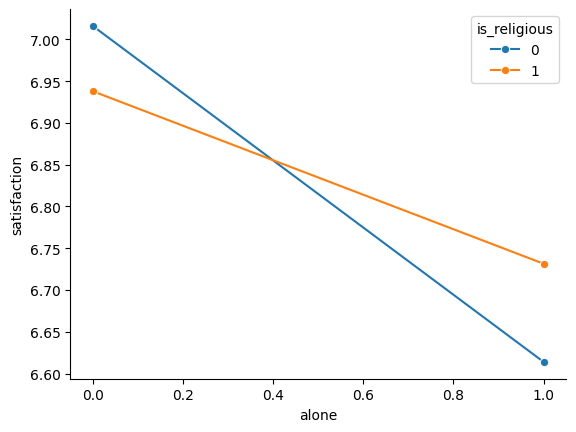

In [73]:
ax = sns.lineplot(data = avg_satisfaction_groups_data, x = 'alone', y = 'satisfaction', hue = 'is_religious', marker = 'o')
sns.despine()

#### 2. Describe what you see in your plot

It seems that the more alone a person is, the less satisfaction they have. I also see that religious people tend to have a higher satisfaction compared to non-religious people. Finally, I can see that lonely people tend to have a larger gap in satisfaction compared to together people when we account for religion.

### Part 3: Answering the question

Next, let's analyze if religious persons are less affected by being alone (in terms of family status) in the data. Estimate the model in the form:

$$ satisfaction_i = β0 + β1 · alone_i + β2 · religious_i + β3 · alone_i × religious_i + ϵ_i. $$

#### 1. Estimate the model and show the model summary

In [76]:
import statsmodels.api as sm

model = sm.OLS.from_formula("satisfaction ~ alone + is_religious + alone:is_religious", data = data_filtered).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           satisfaction   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     105.5
Date:                Tue, 08 Oct 2024   Prob (F-statistic):           3.35e-68
Time:                        11:01:11   Log-Likelihood:            -1.8976e+05
No. Observations:               85099   AIC:                         3.795e+05
Df Residuals:                   85095   BIC:                         3.796e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              7.0162      0

#### 2. Interpret the model coefficients

$\beta_0$ (Intercept): A person who is not alone and not religious (and keeping other coefficients constant) will have a an average satisfaction of 7.0162

$\beta_1$ (alone): A person who is alone and not religious (keeping other coefficients constant) will have an average decrease of 0.4022 in satisfaction.

$\beta_2$ (is_religious): A person who is not alone and is religious (keeping other coefficients constant) will have an average decrease of 0.0781 in satisfaction.

$\beta_3$ (alone:is_religious): A person who is alone and is religoius (keeping other coefficients constant) will have an average increase of 0.1957 in satisfaction.

**LOOK AT THE GRAPH**

B0 is the y-intercept

B1 slope of line for alone but not religious

B2 is the difference between the first points

B3 is the difference between the last point and the counterfactual point (just go up or down from the last point by B3 amount)

#### 3. Based on your analysis, do religious people have higher life satisfaction even when alone? Is the effect significant?

According to $\beta_3$, religious people who are alone will experience an average increase of 0.1957 in satisfaction. This is statistically significant since the p-value of our t-test is < 0.05.

#### 4. Based on your analysis, can you answer the question: does religion help ameliorate the effect of loneliness?

While we can see from the analysis itself that religion does increase satisfaction, even for lonely people, we have to note that we kept other coefficients at constant. We would need to include (or exclude) other variables before we confirm this relationship.